# Air pollution Data Scraping and Analysis

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
# Step 1: Getting page content
path = "https://www.aqi.in/in/dashboard/india"
page = requests.get(path)
soup = BeautifulSoup(page.text, 'html.parser') 

In [3]:
# Step 2: Extracting column headers
headers = []
for i in range(1, 8):
    element = soup.find("div", attrs={"data-column-id": str(i), "role": "columnheader"})
    if element:
        headers.append(element.text.strip())

In [9]:
print(headers)

['Location', 'Status', 'AQI', 'PM2.5(µg/m³)', 'PM10(µg/m³)', 'Temp.(°C)', 'Humi.(%)']


In [4]:
# Step 3: Extracting all data rows
table_rows = soup.find_all("div", role="row")[1:]  # skip header row
data = []
for row in table_rows:
    cells = row.find_all('div', role='cell')
    row_data = [cell.text.strip() for cell in cells]
    if row_data:
        data.append(row_data)

In [7]:
data

[['Andhra Pradesh', 'Moderate', '66', '17', '46', '28', '64'],
 ['Arunachal Pradesh', 'Good', '50', '10', '22', '24', '84'],
 ['Assam', 'Moderate', '57', '12', '30', '28', '76'],
 ['Bihar', 'Moderate', '70', '20', '48', '29', '82'],
 ['Chandigarh', 'Moderate', '86', '28', '62', '29', '81'],
 ['Chhattisgarh', 'Moderate', '56', '12', '31', '25', '83'],
 ['Dadra And Nagar Haveli', 'Moderate', '83', '26', '88', '27', '86'],
 ['Daman And Diu', 'Moderate', '85', '27', '94', '26', '79'],
 ['Delhi', 'Moderate', '93', '31', '77', '31', '70'],
 ['Goa', 'Moderate', '72', '20', '50', '27', '63'],
 ['Gujarat', 'Moderate', '82', '26', '64', '28', '78'],
 ['Haryana', 'Moderate', '92', '31', '69', '29', '71'],
 ['Himachal Pradesh', 'Moderate', '79', '24', '63', '24', '48'],
 ['Jammu And Kashmir', 'Moderate', '73', '29', '70', '25', '49'],
 ['Jharkhand', 'Moderate', '65', '17', '44', '27', '84'],
 ['Karnataka', 'Moderate', '62', '15', '40', '25', '72'],
 ['Kerala', 'Moderate', '69', '18', '49', '29', '

In [10]:
# Step 4: Creating DataFrame
df = pd.DataFrame(data, columns=headers)
df

,Location,Status,AQI,PM2.5(µg/m³),PM10(µg/m³),Temp.(°C),Humi.(%)
0,Andhra Pradesh,Moderate,66,17,46,28,64
1,Arunachal Pradesh,Good,50,10,22,24,84
2,Assam,Moderate,57,12,30,28,76
3,Bihar,Moderate,70,20,48,29,82
4,Chandigarh,Moderate,86,28,62,29,81
5,Chhattisgarh,Moderate,56,12,31,25,83
6,Dadra And Nagar Haveli,Moderate,83,26,88,27,86
7,Daman And Diu,Moderate,85,27,94,26,79
8,Delhi,Moderate,93,31,77,31,70
9,Goa,Moderate,72,20,50,27,63


In [ ]:
# Step 5: Exporting to CSV
df.to_csv("/Users/mehul/Documents/data scicence/projects/AirPollution/Data/india_aqi_data.csv", index=False)
print("✅ Data exported to 'india_aqi_data.csv'")

# Data Cleaning 
### 1 Removing dots or unwated symbols from name 
### 2 Type conversion of columns 
### 3 Removing null values 

In [21]:
print(df.columns)

Index(['Location', 'Status', 'AQI', 'PM2.5(µg/m³)', 'PM10(µg/m³)', 'Temp.(°C)',
       'Humi.(%)'],
      dtype='object')


In [22]:
df.columns = df.columns.str.strip()

In [23]:
print(df[['AQI', 'Temp.(°C)', 'Humi.(%)']].dtypes)

AQI          object
Temp.(°C)    object
Humi.(%)     object
dtype: object


In [24]:
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')
df['Temp.(°C)'] = pd.to_numeric(df['Temp.(°C)'], errors='coerce')
df['Humi.(%)'] = pd.to_numeric(df['Humi.(%)'], errors='coerce')

In [26]:
corr_data = df[['AQI', 'Temp.(°C)', 'Humi.(%)']].dropna()

# Key findings

## 1. Top 5 Most Polluted States by AQI

In [11]:
df.sort_values(by='AQI', ascending=False).head(5)

,Location,Status,AQI,PM2.5(µg/m³),PM10(µg/m³),Temp.(°C),Humi.(%)
8,Delhi,Moderate,93,31,77,31,70
11,Haryana,Moderate,92,31,69,29,71
25,Punjab,Moderate,91,30,63,27,76
26,Rajasthan,Moderate,88,29,63,28,79
4,Chandigarh,Moderate,86,28,62,29,81


## 2. States with ‘Good’ Air Quality Status

In [12]:
df[df['Status'] == 'Good']

,Location,Status,AQI,PM2.5(µg/m³),PM10(µg/m³),Temp.(°C),Humi.(%)
1,Arunachal Pradesh,Good,50,10,22,24,84
19,Manipur,Good,36,7,19,24,75
20,Meghalaya,Good,39,7,19,22,81
21,Mizoram,Good,25,4,13,26,83
22,Nagaland,Good,42,8,24,20,87


## 3. Average PM2.5 and PM10 Levels Nationwide

In [16]:
df[['PM2.5(µg/m³)', 'PM10(µg/m³)']].mean().round(2)

PM2.5(µg/m³)    5.029771e+61
PM10(µg/m³)     1.359501e+66
dtype: float64

# Data Visualization

## 1. AQI Category Count (Status Column)

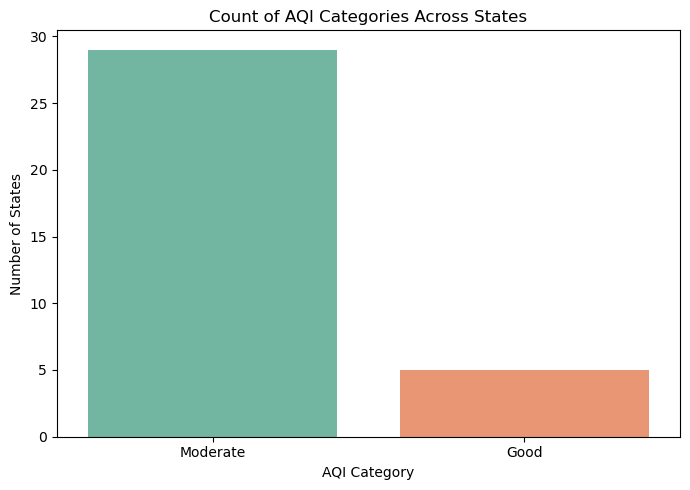

In [41]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Status', data=df, palette='Set2')
plt.title('Count of AQI Categories Across States')
plt.xlabel('AQI Category')
plt.ylabel('Number of States')
plt.tight_layout()
plt.show()

## 2. Bar Plot of AQI by State

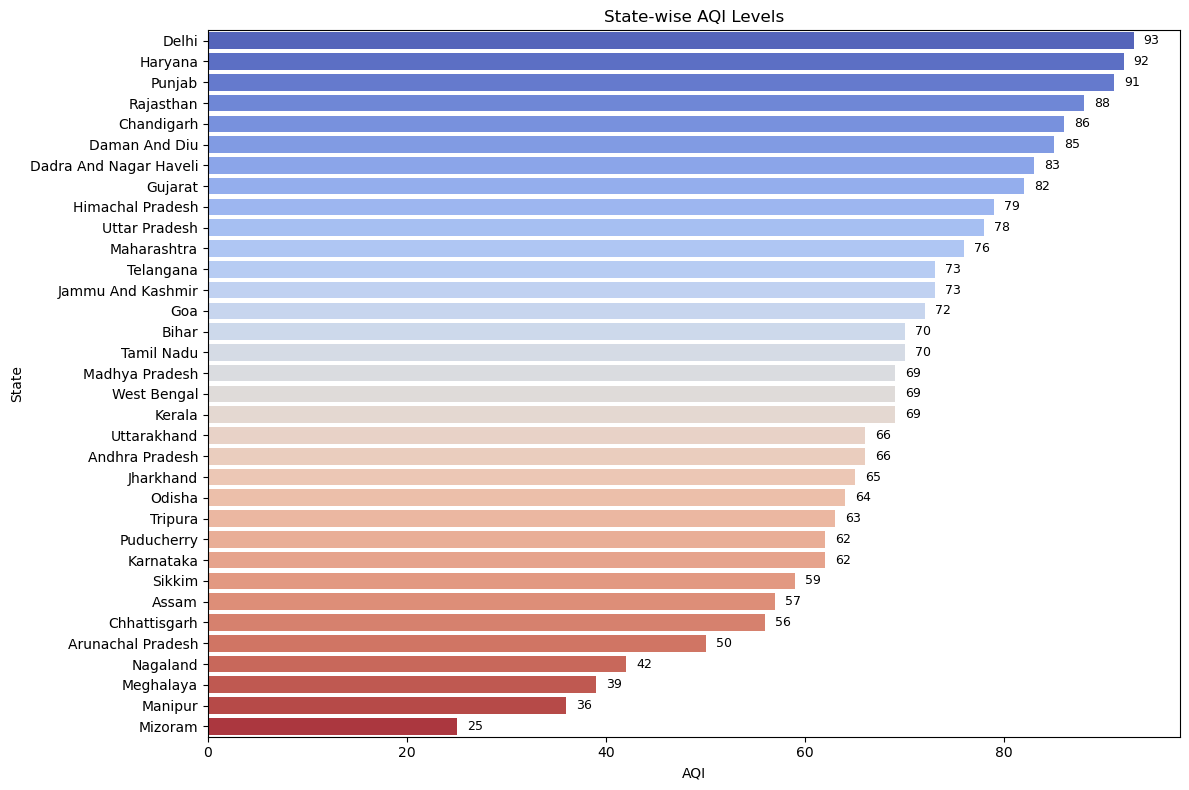

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by AQI in descending order
df_sorted = df.sort_values(by='AQI', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y='Location', x='AQI', data=df_sorted, palette='coolwarm')

# Add AQI value labels at the end of each bar
for index, value in enumerate(df_sorted['AQI']):
    plt.text(value + 1, index, str(value), va='center', fontsize=9)  # value + 1 to offset the text slightly right

plt.title('State-wise AQI Levels')
plt.xlabel('AQI')
plt.ylabel('State')
plt.tight_layout()
plt.show()

## 3. State-wise Temperature and Humidity Scatter Plot (Bubble)

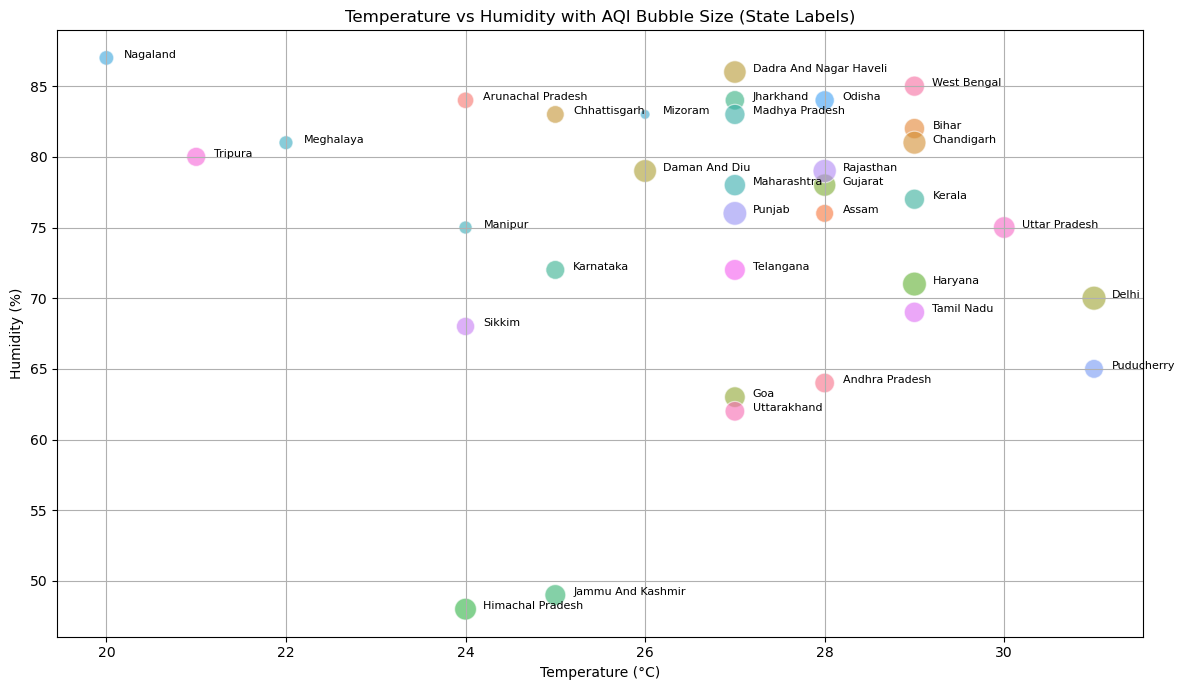

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

# Bubble scatter plot
sns.scatterplot(
    x='Temp.(°C)',
    y='Humi.(%)',
    size='AQI',
    hue='Location',
    data=df,
    legend=False,
    sizes=(50, 300),
    alpha=0.6
)

# Annotate each point with the state name
for i in range(len(df)):
    plt.text(
        df['Temp.(°C)'][i] + 0.2,  # slightly offset text
        df['Humi.(%)'][i],
        df['Location'][i],
        fontsize=8
    )

plt.title('Temperature vs Humidity with AQI Bubble Size (State Labels)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. State-wise PM2.5 and PM10 Comparison

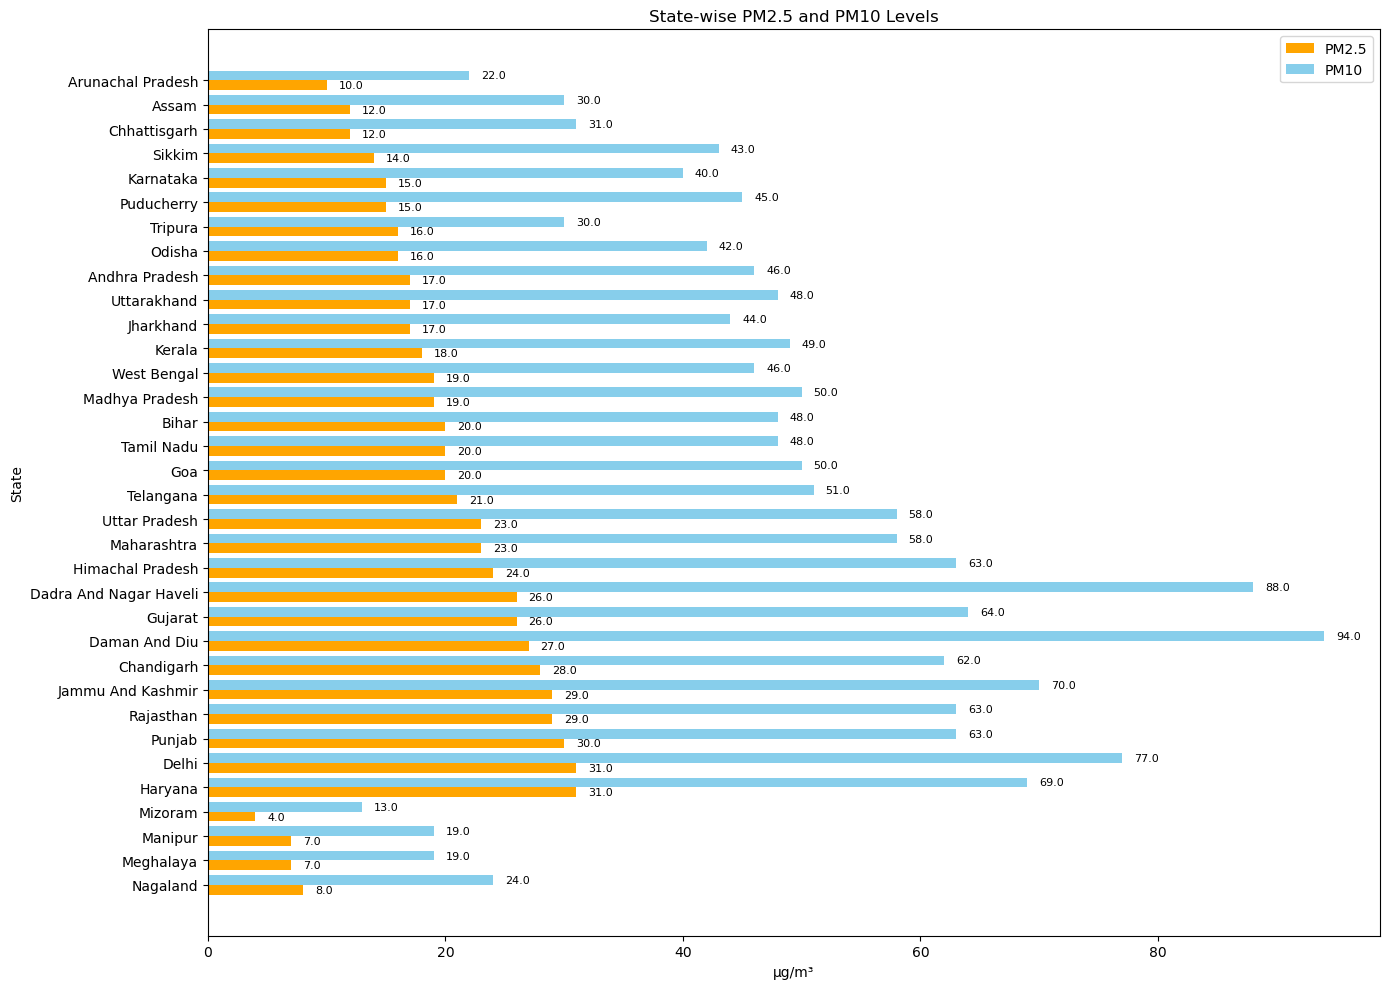

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Sort by PM2.5
df_sorted = df.sort_values(by='PM2.5(µg/m³)', ascending=False)
states = df_sorted['Location']
y_pos = np.arange(len(states))

# Ensure numeric types
pm25 = df_sorted['PM2.5(µg/m³)'].astype(float)
pm10 = df_sorted['PM10(µg/m³)'].astype(float)
bar_width = 0.4

plt.figure(figsize=(14, 10))

# PM2.5 bars
plt.barh(y_pos - bar_width/2, pm25, height=bar_width, label='PM2.5', color='orange')

# PM10 bars
plt.barh(y_pos + bar_width/2, pm10, height=bar_width, label='PM10', color='skyblue')

# Add value labels to PM2.5 bars
for i, value in enumerate(pm25):
    plt.text(float(value) + 1, y_pos[i] - bar_width/2, f'{value}', va='center', fontsize=8)

# Add value labels to PM10 bars
for i, value in enumerate(pm10):
    plt.text(float(value) + 1, y_pos[i] + bar_width/2, f'{value}', va='center', fontsize=8)

plt.yticks(y_pos, states)
plt.xlabel('µg/m³')
plt.ylabel('State')
plt.title('State-wise PM2.5 and PM10 Levels')
plt.legend()
plt.tight_layout()
plt.show()

# 📊 Key Findings

1 Overall Air Quality: Most Indian states fall under the Moderate AQI category, indicating a moderate health concern for sensitive individuals.

2 Top Polluted States: States like Chandigarh, Delhi, Punjab, and Haryana have noticeably higher AQI levels compared to others, primarily driven by elevated PM2.5 and PM10 concentrations.

3 Cleanest States: Mizoram, Manipur, and Nagaland show the cleanest air, with the lowest PM2.5 levels and AQI values close to the Good category.

4 Weather Influence: A moderate positive correlation is seen between temperature and AQI, suggesting warmer states may experience slightly higher pollution levels. However, humidity did not show a strong relationship with AQI.

5 Critical Pollutants: PM2.5 levels are more alarming than PM10 in most states, highlighting the need for finer dust and emissions control measures.